In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import math
%matplotlib inline

In [2]:
#Gain control function
def gain(v,order,B):
    if v <0:
        return 1
    else:
        return 1/(1+(B*v)**order)

In [3]:
nstep = 3000#Time step
stimulus = np.zeros(nstep)
frequency = 30#Pulse frequency
for i in range(nstep):
    if i%int(1000/frequency)< int(1000/frequency)/2:
        stimulus[i] = 1
original_stimulus = stimulus.copy()

Text(0.5, 1.0, 'Feedback filter')

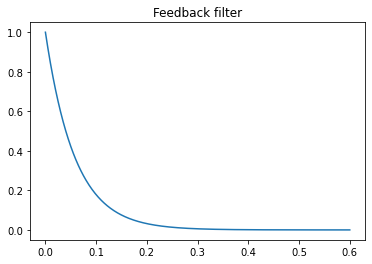

In [10]:
#Feedback filter for u
dt=0.001
tau = 0.058#sec
filter_time = 0.6#filter length(sec)
feedback_filter = np.exp(-np.arange(0,filter_time+dt,dt)/tau)
plt.plot(np.arange(0,filter_time+dt,dt),feedback_filter)
plt.title('Feedback filter')

In [17]:
order = 4
B = 50
u = np.zeros(nstep)#Output
gains = np.zeros(nstep)#All gain value
#Main part
for i in range(len(feedback_filter),nstep,1):
    v = np.convolve(feedback_filter,stimulus[i-len(feedback_filter)+1:i+1],'valid')*dt
    g = gain(v,order,B)#gain value
    gains[i] = g
    stimulus[i] = stimulus[i]*g
    u[i] = stimulus[i]
    


Text(0.5, 1.0, 'Gain value')

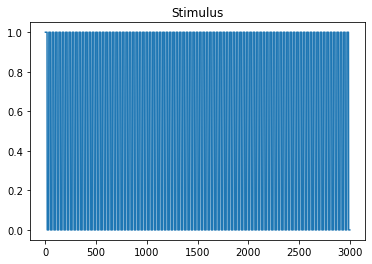

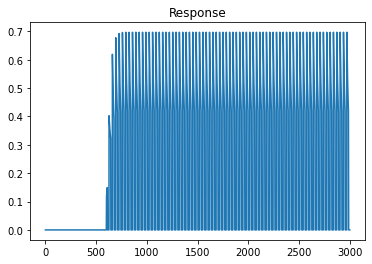

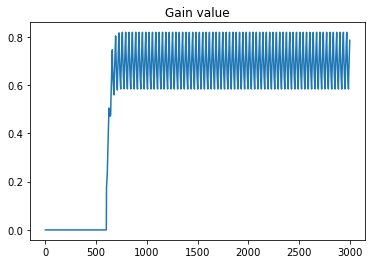

In [19]:
plt.plot(original_stimulus)
# plt.xlim([2500,2600])
plt.title('Stimulus')
plt.figure()
plt.plot(u)
# plt.xlim([2500,2600])
plt.title('Response')
plt.figure()
plt.plot(gains)
# plt.xlim([2500,2600])
plt.title('Gain value')